In [1]:
# Load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.titlesize'] = 14.0
plt.rcParams['xtick.labelsize'] = 12.0
plt.rcParams['ytick.labelsize'] = 12.0
plt.rcParams['legend.fontsize'] = 12.0
plt.style.use('ggplot')
from matplotlib.pyplot import *
from ggplot import *
%matplotlib inline


/Users/arthur/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/arthur/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/arthur/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read the data in
instacart_data = pd.read_csv("clean_final_i_set.csv", encoding='latin1')
instacart_data.head() # Check if headers are correct

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,0,1959414,3214,prior,1,2,11,NaN,2994,1,0,"Sushi Nori, Pacific, Organic",66,6,asian foods
1,1,1266616,114871,prior,5,0,13,7.0,2994,11,0,"Sushi Nori, Pacific, Organic",66,6,asian foods
2,2,3166823,3214,prior,3,2,18,20.0,18977,1,0,Mild Sweet Chili Sauce,66,6,asian foods
3,3,1959414,3214,prior,1,2,11,NaN,95,11,0,Organic Rice Vinegar,66,6,asian foods
4,4,1559052,70611,prior,17,5,15,30.0,95,8,0,Organic Rice Vinegar,66,6,asian foods


In [3]:
# Exploring the data
# Average add_to_cart_orders
print('Average add_to_cart_orders: ' + str(instacart_data['add_to_cart_order'].mean()))

# Average num of days since prior order
print('Average days_since_prior_order: ' + str(instacart_data['days_since_prior_order'].mean()))

instacart_data.describe() # Check data for inconsistencies

Average add_to_cart_orders: 8.350728070786595
Average days_since_prior_order: 13.109791619986556


,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,14353.000000,1.435300e+04,14353.000000,14353.000000,14353.000000,14353.000000,13389.000000,14353.000000,14353.000000,14353.000000,14353.000000,14353.000000
mean,7176.000000,1.742779e+06,86620.492162,11.760399,2.730161,13.871873,13.109792,25785.856197,8.350728,0.541559,72.225946,9.959242
std,4143.498542,9.911516e+05,53524.742396,10.355872,2.139927,4.367900,9.026157,14190.783300,6.646925,0.498287,38.104741,6.316713
min,0.000000,2.078000e+03,3214.000000,1.000000,0.000000,0.000000,0.000000,23.000000,1.000000,0.000000,1.000000,1.000000
25%,3588.000000,9.452440e+05,42227.000000,4.000000,1.000000,11.000000,6.000000,13646.000000,3.000000,0.000000,31.000000,4.000000
50%,7176.000000,1.743674e+06,80816.000000,8.000000,2.000000,14.000000,10.000000,25705.000000,7.000000,1.000000,83.000000,9.000000
75%,10764.000000,2.596703e+06,138934.000000,16.000000,5.000000,17.000000,19.000000,38558.000000,12.000000,1.000000,107.000000,16.000000
max,14352.000000,3.420673e+06,205854.000000,57.000000,6.000000,23.000000,30.000000,49683.000000,52.000000,1.000000,133.000000,21.000000


# How does number of orders differ throughout the day?

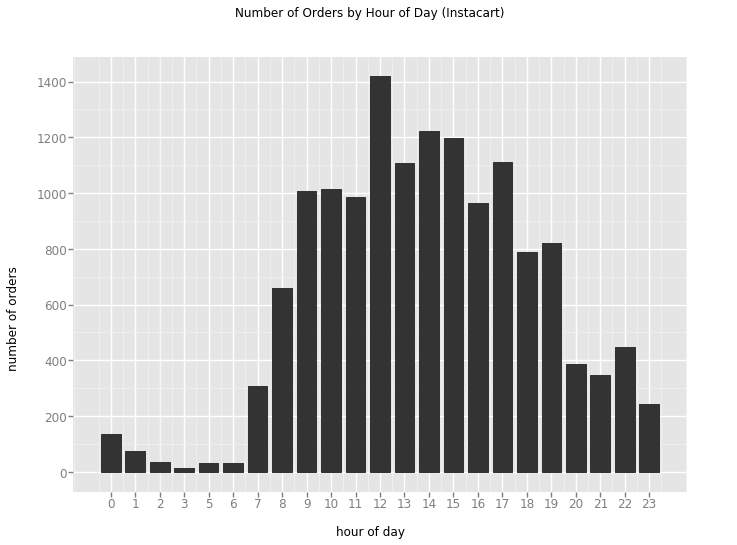

<ggplot: (-9223372036570539804)>

In [5]:
p = ggplot(aes(x='order_hour_of_day'), data=instacart_data)
p + geom_bar() + labs(x = "hour of day", y = "number of orders", title = "Number of Orders by Hour of Day (Instacart)")

# When do people usually reorder?


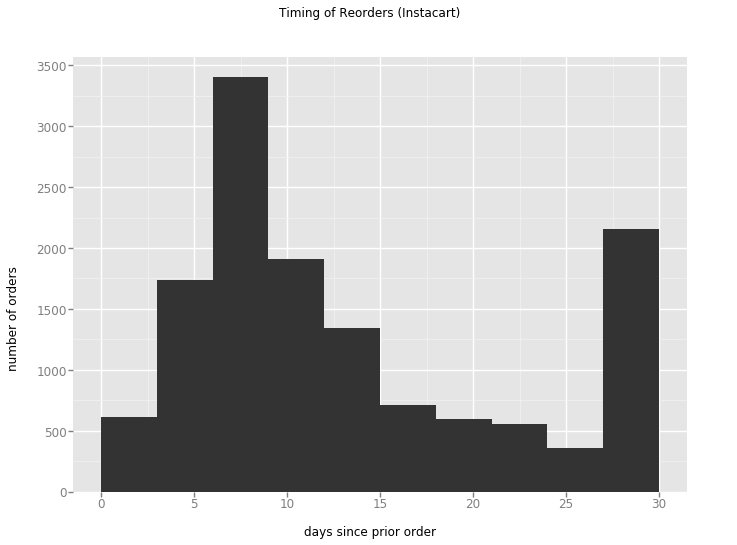

<ggplot: (292546459)>

In [22]:
ggplot(instacart_data, aes(x='days_since_prior_order')) + geom_histogram() +\
labs(x = "days since prior order", y = "number of orders", title = "Timing of Reorders (Instacart)")

In [27]:
instacart_data.groupby("order_hour_of_day").describe() # See if there are difference among variables by hour of day


add_to_cart_order                                         \
                              count       mean        std  min   25%   50%   
order_hour_of_day                                                            
0                             144.0   8.375000   5.840389  1.0  4.00   7.0   
1                             113.0  13.831858  11.060631  1.0  5.00  11.0   
2                              54.0   9.296296   6.514511  1.0  4.00   7.5   
3                               6.0   3.500000   1.870829  1.0  2.25   3.5   
4                              28.0   9.785714   6.679749  1.0  4.00   8.5   
5                              67.0   9.343284   5.663686  1.0  5.00   9.0   
6                             179.0   8.391061   6.579943  1.0  3.00   6.0   
7                             616.0   9.663961   8.137581  1.0  4.00   7.5   
8                             978.0   7.582822   5.811416  1.0  3.00   6.0   
9                            1314.0   8.558600   6.705421  1.0  3.00   7.0   
10                           1490.0   7.960403   5.955547  1.0  3.00   6.0   
11                           1381.0   7.771180   5.960115  1.0  3.00   6.0   
12                           1186.0   7.935076   6.600857  1.0  3.00   6.0   
13                           1458.0   7.875171   6.134462  1.0  3.00   6.0   
14                           1616.0   8.685644   7.692315  1.0  3.00   7.0   
15                           1506.0   8.899070   7.769891  1.0  3.00   7.0   
16                           1154.0   9.409012   8.117254  1.0  3.00   7.0   
17                           1608.0   7.359453   5.569845  1.0  3.00   6.0   
18                           1273.0   8.438335   7.219242  1.0  3.00   6.0   
19                            938.0   7.977612   6.857953  1.0  3.00   6.0   
20                            505.0   8.613861   7.865398  1.0  3.00   6.0   
21                            645.0   8.401550   6.918222  1.0  3.00   7.0   
22                            453.0   7.487859   5.311780  1.0  3.00   6.0   
23                            408.0   8.014706   5.682403  1.0  3.00   7.0   

                               aisle_id              ...    reordered       \
                     75%   max    count       mean   ...          75%  max   
order_hour_of_day                                    ...                     
0                  12.00  26.0    144.0  70.972222   ...          1.0  1.0   
1                  20.00  43.0    113.0  67.345133   ...          1.0  1.0   
2                  14.00  24.0     54.0  63.259259   ...          1.0  1.0   
3                   4.75   6.0      6.0  80.333333   ...          1.0  1.0   
4                  15.25  22.0     28.0  67.071429   ...          1.0  1.0   
5                  13.00  23.0     67.0  66.716418   ...          1.0  1.0   
6                  12.50  28.0    179.0  74.452514   ...          1.0  1.0   
7                  14.00  47.0    616.0  75.714286   ...          1.0  1.0   
8                  11.00  30.0    978.0  72.455010   ...          1.0  1.0   
9                  12.00  36.0   1314.0  72.136225   ...          1.0  1.0   
10                 11.00  38.0   1490.0  74.125503   ...          1.0  1.0   
11                 11.00  40.0   1381.0  71.833454   ...          1.0  1.0   
12                 11.00  39.0   1186.0  73.130691   ...          1.0  1.0   
13                 11.00  35.0   1458.0  70.517833   ...          1.0  1.0   
14                 12.00  53.0   1616.0  71.735767   ...          1.0  1.0   
15                 12.00  49.0   1506.0  71.313413   ...          1.0  1.0   
16                 13.00  45.0   1154.0  74.802426   ...          1.0  1.0   
17                 10.00  39.0   1608.0  69.312811   ...          1.0  1.0   
18                 11.00  47.0   1273.0  70.956795   ...          1.0  1.0   
19                 11.00  39.0    938.0  66.663113   ...          1.0  1.0   
20                 12.00  42.0    505.0  71.102970   ...          1.0  1.0   
21                 11.00  40.0    645.0

# How does number of items in cart vary by parts of the day?

In [4]:
#Create a new dataframe called order_num with the number of total items in cart per order_id
order_num = pd.Series.to_frame(instacart_data.groupby(['order_id'], sort=False)['add_to_cart_order'].max())

In [5]:
order_num.head() # Check if dataframe grouping worked

,add_to_cart_order
order_id,
1959414,14
1266616,17
3166823,17
1559052,8
2740585,12


In [6]:
# See how number of total items in the cart varies
order_num.describe()

,add_to_cart_order
count,1360.000000
mean,10.553676
std,7.373464
min,1.000000
25%,5.000000
50%,9.000000
75%,15.000000
max,52.000000


In [7]:
# Peak hours: 12pm, 2pm and 3pm
# What are average cart sizes for peak hours compared to regular hours?
order_hour_of_day_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
data_to_plot = []

# Calculate median, max, min and spread values for boxplot 
def calc_boxplot_val(hourofday):
    # Locate rows for orders made during hourofday
    locate_rows = instacart_data.loc[instacart_data['order_hour_of_day'] == hourofday]
    # Create a new dataframe with total number of items for every order_id
    find_total_items = pd.Series.to_frame(locate_rows.groupby(['order_id'], sort=False)['add_to_cart_order'].max())
    pd.options.display.float_format = '{:.2f}'.format
    center = find_total_items['add_to_cart_order'].median()
    high = find_total_items['add_to_cart_order'].max()
    low = find_total_items['add_to_cart_order'].min()
    spread = high-low
    data = [spread, center, high, low]
    data_to_plot.append(data)

# Apply calc_boxplot_val to all hours of the day
data_to_plot_list = list(map(calc_boxplot_val,order_hour_of_day_list))    


In [8]:
# Making sure data_to_plot list length contains all hours
len(data_to_plot)

24

/Users/arthur/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/arthur/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/arthur/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/arthur/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/arthur/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


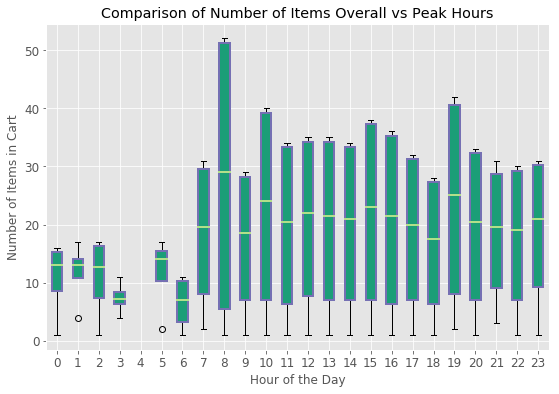

In [9]:
# Boxplot

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True)

# change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
# Custom x-axis labels
ax.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',\
                   '21','22','23'])

ax.set_title('Comparison of Number of Items Overall vs Peak Hours')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Items in Cart')


In [10]:
# Checking on results
locate_8 = instacart_data.loc[instacart_data['order_hour_of_day'] == 8]
find_total_items = pd.Series.to_frame(locate_8.groupby(['order_id'], sort=False)['add_to_cart_order'].max())
pd.options.display.float_format = '{:.2f}'.format
find_total_items.describe()

,add_to_cart_order
count,69.00
mean,9.54
std,7.79
min,1.00
25%,5.00
50%,7.00
75%,14.00
max,52.00


In [11]:
# Cut dataset by 6-hour periods into different parts of the day 
ranges = np.array([0, 6, 12, 18, 24], dtype=np.int64)
#ranges = [0.0, 6.0, 12.0, 18.0, 24.0]
labels = ['Early Morning', 'Morning','Early Afternoon','Evening']
instacart_data['time_of_day'] = pd.cut(instacart_data.order_hour_of_day, ranges, labels=labels).astype('category')

In [12]:
instacart_data.time_of_day.head() # Check if classifications worked and display correctly

0            Morning
1    Early Afternoon
2    Early Afternoon
3            Morning
4    Early Afternoon
Name: time_of_day, dtype: category
Categories (4, object): [Early Afternoon < Early Morning < Evening < Morning]

In [13]:
instacart_data['time_of_day'].describe() # Double check categories overall

count               14218
unique                  4
top       Early Afternoon
freq                 6394
Name: time_of_day, dtype: object

In [14]:
# See number of values for each part of the day
instacart_data['time_of_day'].value_counts()

Early Afternoon    6394
Morning            5389
Evening            2246
Early Morning       189
Name: time_of_day, dtype: int64

In [15]:
# Create a new dataframe called new_df with order_id and time_of_day
new_df = pd.Series.to_frame(instacart_data['order_id'])
new_df.columns=['order_id']
new_df['time_of_day'] =  instacart_data['time_of_day']
new_df.head() # Check if dataframe displays correctly; Identified duplicate order_id


,order_id,time_of_day
0,1959414,Morning
1,1266616,Early Afternoon
2,3166823,Early Afternoon
3,1959414,Morning
4,1559052,Early Afternoon


In [16]:
# Remove duplicate order_ids (since time_of_day data will be the same for the same order_id)
new_df = new_df.drop_duplicates(['order_id'], keep='first')

new_df.head()

,order_id,time_of_day
0,1959414,Morning
1,1266616,Early Afternoon
2,3166823,Early Afternoon
4,1559052,Early Afternoon
5,2740585,Early Afternoon


In [17]:
# Set 'order_id' as index for new_df
new_df = new_df.set_index('order_id')
new_df.head(10)

,time_of_day
order_id,
1959414,Morning
1266616,Early Afternoon
3166823,Early Afternoon
1559052,Early Afternoon
2740585,Early Afternoon
1314900,Morning
765910,Morning
1045173,Early Afternoon
1840713,Morning


In [18]:
# Add order_num (column with total items in cart per order_id) to new_df dataframe
new_df['number of items in cart'] = order_num

In [19]:
# Check new_df
new_df.head()

,time_of_day,number of items in cart
order_id,,
1959414,Morning,14
1266616,Early Afternoon,17
3166823,Early Afternoon,17
1559052,Early Afternoon,8
2740585,Early Afternoon,12


In [22]:
# Calculate average orders for each part of the day
order_avgs = pd.Series.to_frame(new_df.groupby(['time_of_day'], sort=False)['number of items in cart'].mean())
pd.options.display.float_format = '{:.2f}'.format
order_avgs.columns = ['average number of items in cart']
order_avgs


,average number of items in cart
time_of_day,
Early Afternoon,10.41
Early Morning,8.59
Evening,11.52
Morning,10.44


# If people order at meal times, how much more likely are they to order more quantities of food?


In [23]:
# Cut dataframe into standard mealtime hours
# Breakfast - 7-9am
# Lunch - 12-1pm
# Dinner - 5-7pm
meal_ranges = np.array([0, 7, 9, 12, 13, 17, 19, 24], dtype=np.int64)
meal_labels = ['Reg', 'Breakfast','Reg','Lunch', 'Reg', 'Dinner', 'Reg']

instacart_data['meal_time_of_day'] = pd.cut(instacart_data.order_hour_of_day, meal_ranges, labels=meal_labels).astype('category')

In [24]:
# Create a new dataframe, called new_meal_df, with order_id, meal_time_of_day and delete duplicate order_ids
new_meal_df = pd.Series.to_frame(instacart_data['order_id'])
new_meal_df.columns=['order_id']
new_meal_df['meal_time_of_day'] =  instacart_data['meal_time_of_day']
new_meal_df = new_meal_df.drop_duplicates(['order_id'], keep='first')

In [25]:
# Set order_id as index and add order_num (with total number of items per order_id) to dataframe
new_meal_df = new_meal_df.set_index('order_id')
new_meal_df['number of items in cart'] = order_num
new_meal_df.head()

,meal_time_of_day,number of items in cart
order_id,,
1959414,Reg,14
1266616,Lunch,17
3166823,Dinner,17
1559052,Reg,8
2740585,Reg,12


In [26]:
# Calculate averages for mealtimes of the day
mealtime_avgs = pd.Series.to_frame(new_meal_df.groupby(['meal_time_of_day'], sort=False)['number of items in cart'].mean())
pd.options.display.float_format = '{:.2f}'.format
mealtime_avgs.columns = ['average number of items in cart']
mealtime_avgs

,average number of items in cart
meal_time_of_day,
Breakfast,9.68
Dinner,11.10
Lunch,10.35
Reg,10.66


# Does a smaller number of days since prior order lead to less items on average in a user’s cart?

In [153]:
# Create new dataframe called days_since_df, with order_id, days_since_prior_order and order_num
days_since_df = pd.Series.to_frame(instacart_data['order_id'])
days_since_df.columns=['order_id']
days_since_df['days_since_prior_order'] =  instacart_data['days_since_prior_order']
# Remove duplicate order_ids
days_since_df = days_since_df.drop_duplicates(['order_id'], keep='first')
# Set index to order_id
days_since_df = days_since_df.set_index('order_id')
# Add order_num as column 'number of items in cart'
days_since_df['number of items in cart'] = order_num
days_since_df.describe()

,days_since_prior_order,number of items in cart
count,1260.000000,1360.000000
mean,12.911111,10.553676
std,9.223379,7.373464
min,0.000000,1.000000
25%,6.000000,5.000000
50%,10.000000,9.000000
75%,19.000000,15.000000
max,30.000000,52.000000


In [154]:
# Create dataframe called days_since_avgs, grouped by days_since_prior_order plus the average number of items 
# in cart for people ordered again 0-30 days since their last order.
days_since_avgs = pd.Series.to_frame(days_since_idx.groupby(['days_since_prior_order'], sort=False)\
                                     ['number of items in cart'].mean())
days_since_avgs = days_since_avgs.sort_index()
days_since_avgs.head()

,number of items in cart
days_since_prior_order,
0.0,8.615385
1.0,8.291667
2.0,8.081081
3.0,6.766667
4.0,9.757576


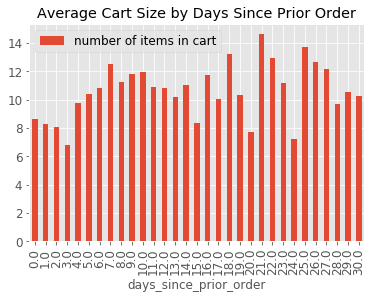

In [57]:
# Plot
days_since_avgs.plot(kind = 'bar', title='Average Cart Size by Days Since Prior Order')


In [80]:
# Take a look at the top days with the highest average number of items in cart
days_since_avgs.sort_values('number of items in cart', ascending=False).head()


,number of items in cart
days_since_prior_order,
21.0,14.631579
25.0,13.750000
18.0,13.235294
22.0,12.937500
26.0,12.636364


In [155]:
# Create dataframe called days_since_counts, grouped by days_since_prior_order plus the count of times people ordered\
# again for values between 0-30 days since their last order. 
days_since_counts = pd.Series.to_frame(days_since_idx.groupby(['days_since_prior_order'], sort=False)['number of items in cart'].count())
days_since_counts = days_since_counts.sort_index()

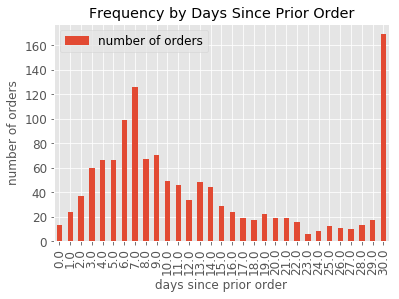

In [156]:
# Plot
fig, ax = subplots()

days_since_counts_plot = days_since_counts.plot(kind='bar', title='Frequency by Days Since Prior Order', ax=ax)
ax.legend(["number of orders"])
days_since_counts_plot.set_xlabel('days since prior order')
days_since_counts_plot.set_ylabel('number of orders')


# Instacart classification for aisles

In [157]:
## Healthy and unhealthy food groupings

health_group = []
for food in instacart_data.aisle:
    #print(food)
    if food in ['bulk dried fruits vegetables','bulk grains rice dried goods','canned fruit applesauce',
               'canned jarred vegetables','canned meat seafood','cereal','dry pasta','eggs',
                'energy granola bars','fresh fruits','fresh herbs','fresh pasta','fresh vegetables',
                'frozen meat seafood','frozen produce','frozen vegan vegetarian','fruit vegetable snacks',
                'grains rice dried goods','granola','juice nectars','meat counter','milk','nuts seeds dried fruit',
                'packaged poultry','packaged produce','packaged seafood','packaged vegetables fruits','poultry counter',
                'seafood counter','soy lactosefree','specialty cheeses','tea','tofu meat alternatives',
                'tortillas flat bread','water seltzer sparkling water','yogurt']:
        health_group.append('healthy')
        #print('appending healthy')
        #print(health_group)
    elif food in ['bakery desserts','breakfast bakery','breakfast bars pastries','butter','candy chocolate',
                  'canned meals beans','chips pretzels','cocoa drink mixes','cookies cakes','cream',
                  'doughs gelatins bake mixes','energy sports drinks','frozen appetizers sides','frozen breads doughs',
                  'frozen breakfast','frozen dessert','frozen meals','frozen pizza','hot cereal pancake mixes',
                  'hot dogs bacon sausage','ice cream ice','ice cream toppings','instant foods','other creams cheeses',
                   'packaged cheese','popcorn jerky','prepared soups salads','refrigerated pudding desserts',
                  'soft drinks','trail mix snack mix']:
        health_group.append('unhealthy')
        #print('appending unhealthy')
        #print(health_group)
    else:
        health_group.append('')
instacart_data['healthy'] = health_group 

# Order Health Composition by user with order_hour_of_day

In [158]:
# Create new dataframe called grouped_by_hr_instacart with order_id and order_hour_of_day
grouped_by_hr_instacart = instacart_data[['order_id', 'order_hour_of_day','healthy']]
grouped_by_hr_instacart.head()

,order_id,order_hour_of_day,healthy
0,1959414,11,
1,1266616,13,
2,3166823,18,
3,1959414,11,
4,1559052,15,


In [160]:
# Calculate percentage of healthy, unhealthy and na for each order_id

healthy_list = []
unhealthy_list = []
na_list = []
graphed_list = []
def add_healthy_count(orderid):
    if orderid not in graphed_list:
        # print('orderid: ' + str(orderid))
        total = (grouped_by_hr_instacart.loc[(grouped_by_hr_instacart["order_id"] == orderid)].count())['order_id']
        healthy_count = (grouped_by_hr_instacart.loc[(grouped_by_hr_instacart["healthy"] == 'healthy') & \
                                               (grouped_by_hr_instacart["order_id"] == orderid)].count())['healthy']
        healthy_list.append((healthy_count/total)*100)
       # print('healthy count: ' + str(healthy_count))
        unhealthy_count = (grouped_by_hr_instacart.loc[(grouped_by_hr_instacart["healthy"] == 'unhealthy') & \
                                                 (grouped_by_hr_instacart["order_id"] == orderid)].count())['healthy']
        unhealthy_list.append((unhealthy_count/total)*100)
       # print('unhealthy count: ' + str(unhealthy_count))
        na_count = (grouped_by_hr_instacart.loc[(grouped_by_hr_instacart["healthy"] == '') &\
                                          (grouped_by_hr_instacart["order_id"] == orderid)].count())['healthy']
        na_list.append((na_count/total)*100)
        graphed_list.append(orderid)

grouped_by_hr_instacart['order_id'].map(add_healthy_count)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
14323    None
14324    None
14325    None
14326    None
14327    None
14328    None
14329    None
14330    None
14331    None
14332    None
14333    None
14334    None
14335    None
14336    None
14337    None
14338    None
14339    None
14340    None
14341    None
14342    None
14343    None
14344    None
14345    None
14346    None
14347    None
14348    None
14349    None
14350    None
14351    None
14352    None
Name: order_id, Length: 14353, dtype: object

In [161]:
grouped_by_hr_instacart.describe()

,order_id,order_hour_of_day
count,1.435300e+04,14353.000000
mean,1.742779e+06,13.871873
std,9.911516e+05,4.367900
min,2.078000e+03,0.000000
25%,9.452440e+05,11.000000
50%,1.743674e+06,14.000000
75%,2.596703e+06,17.000000
max,3.420673e+06,23.000000


In [163]:
# Delete duplicate order_ids from dataframe
grouped_by_hr_instacart = grouped_by_hr_instacart.drop_duplicates(['order_id'], keep='first')

In [164]:
grouped_by_hr_instacart.describe()

,order_id,order_hour_of_day
count,1.360000e+03,1360.000000
mean,1.738548e+06,13.746324
std,9.785673e+05,4.348122
min,2.078000e+03,0.000000
25%,9.499328e+05,11.000000
50%,1.727622e+06,14.000000
75%,2.592082e+06,17.000000
max,3.420673e+06,23.000000


In [165]:
# Add percentage of healthy, unhealthy and na items as new columns to dataframe
grouped_by_hr_instacart['healthy'] = healthy_list
grouped_by_hr_instacart['unhealthy'] = unhealthy_list
grouped_by_hr_instacart['na'] = na_list

In [166]:
grouped_by_hr_instacart.head()

,order_id,order_hour_of_day,healthy,unhealthy,na
0,1959414,11,64.285714,14.285714,21.428571
1,1266616,13,76.470588,5.882353,17.647059
2,3166823,18,70.588235,11.764706,17.647059
4,1559052,15,75.000000,12.500000,12.500000
5,2740585,17,25.000000,16.666667,58.333333


In [167]:
del grouped_by_hr_instacart['order_id']

In [168]:
# Create new dataframe called order_health_mean, grouped by 'order_hour_of_day' and column of mean percentage values
order_health_mean = grouped_by_hr_instacart.groupby('order_hour_of_day').mean()

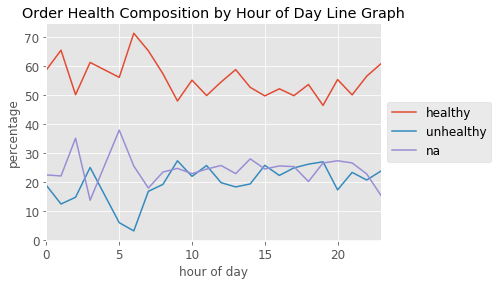

In [169]:
# Plot
health_plot = order_health_mean.plot.line(title = 'Order Health Composition by Hour of Day Line Graph')
health_plot.set_ylabel('percentage')
health_plot.set_xlabel('hour of day')
health_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [170]:
order_health_mean.describe()

,healthy,unhealthy,na
count,23.000000,23.000000,23.000000
mean,55.697921,19.944290,24.357789
std,6.249718,6.345771,5.281118
min,46.486018,3.030303,13.636364
25%,50.155729,17.749872,22.588060
50%,55.227255,20.650445,24.477500
75%,58.846501,24.926466,26.115688
max,71.464646,27.310103,37.933635


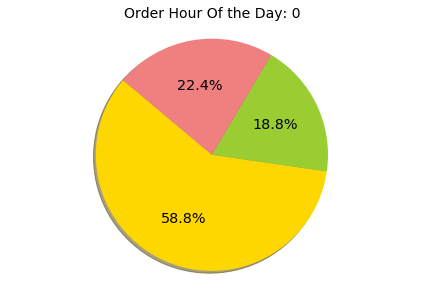

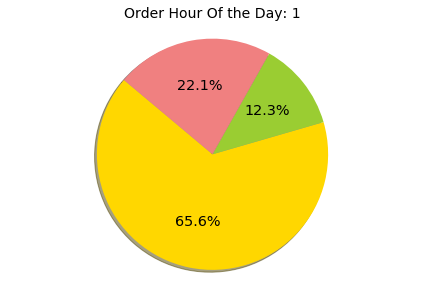

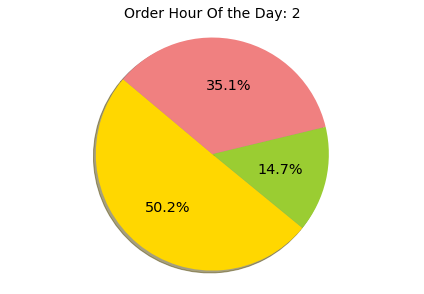

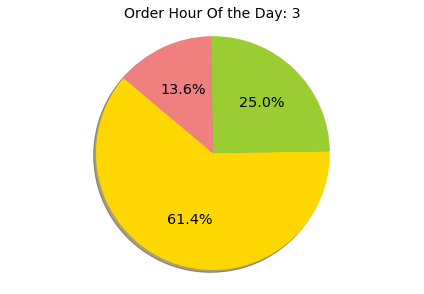

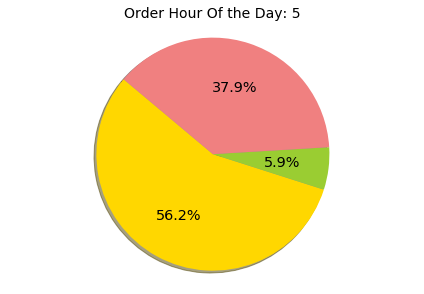

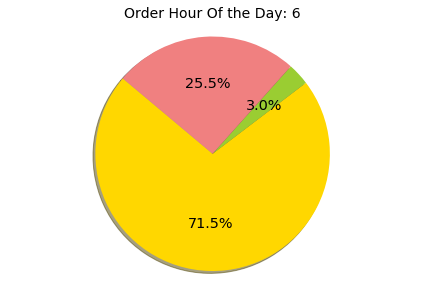

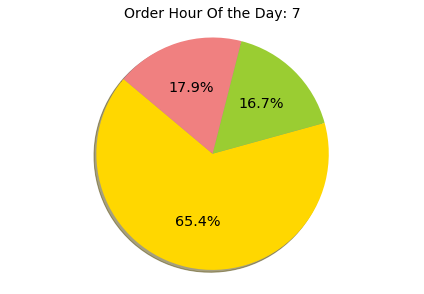

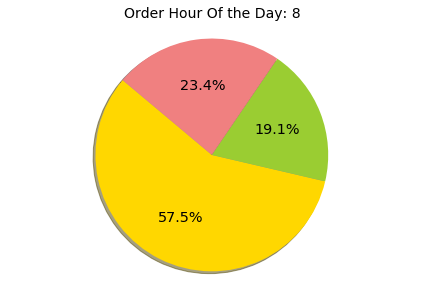

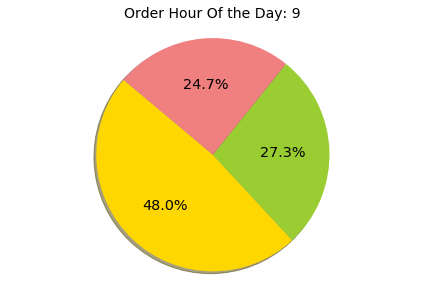

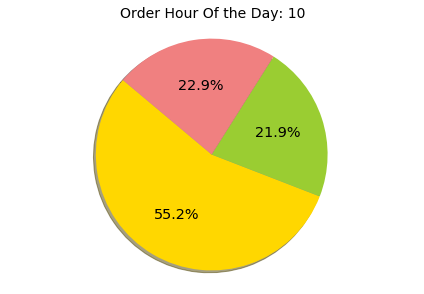

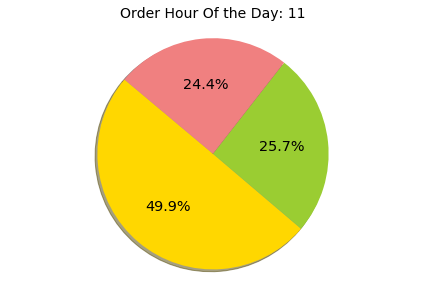

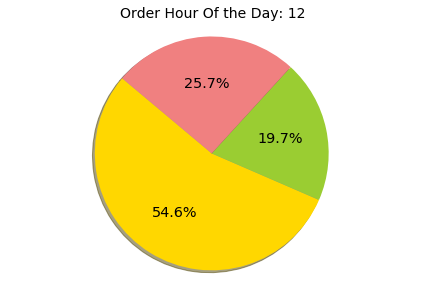

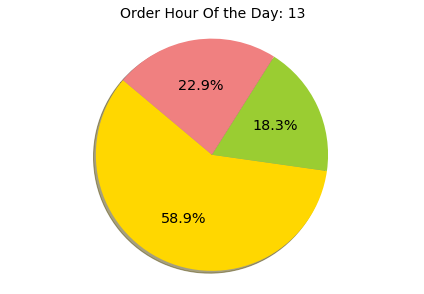

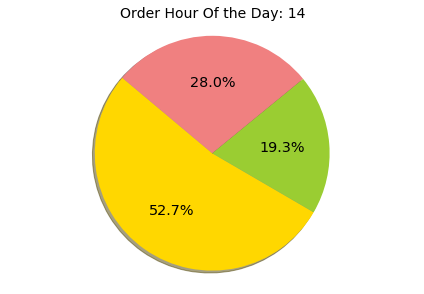

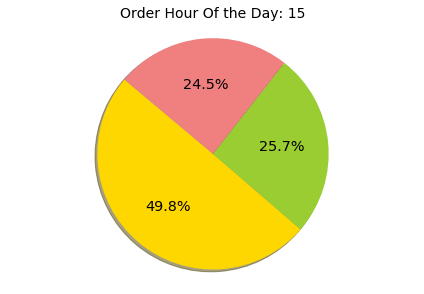

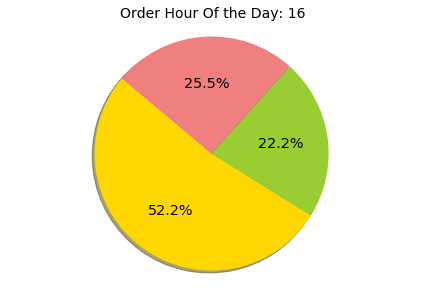

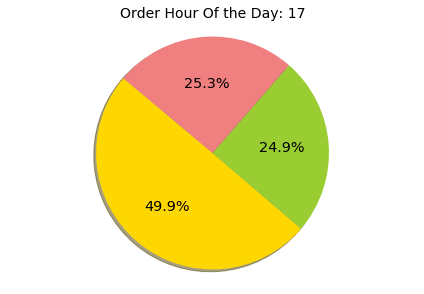

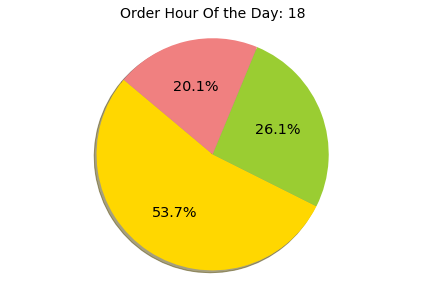

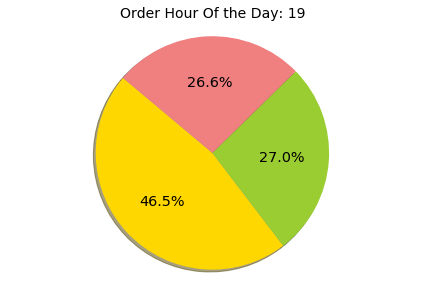

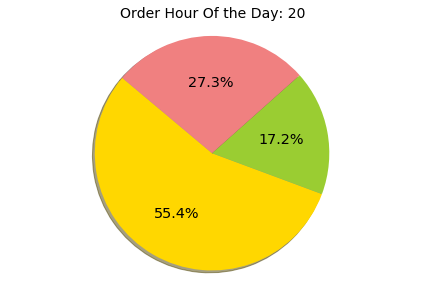

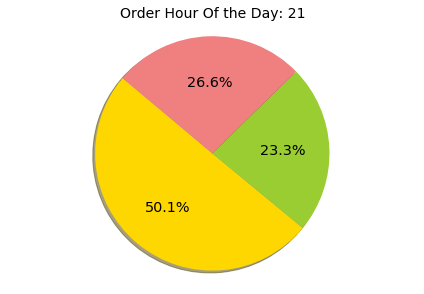

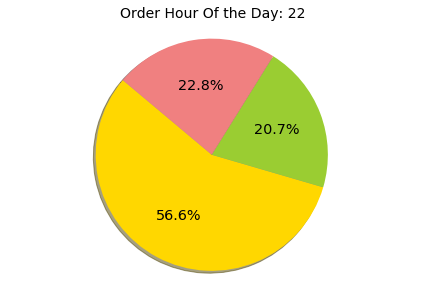

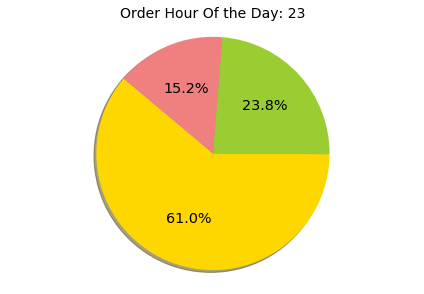

In [38]:
# Create pie charts for each hour of the day for a closer look at percentages
for index, row in order_health_mean.iterrows():
    perc_breakdown = [row['healthy'], row['unhealthy'], row['na']]
    labels = 'healthy', 'unhealthy', 'na'
    colors = ['gold', 'yellowgreen', 'lightcoral']
 
    # Plot
    patches, texts, autotexts = plt.pie(perc_breakdown, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    for t in autotexts:
        t.set_size('x-large')
    #plt.legend(patches, labels, loc=3)
    plt.tight_layout()
    plt.title('Order Hour Of the Day: ' + str(index))
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()

In [171]:
# Find Top 10 order_hour_of_days with highest healthy %
grouped_by_hr_instacart.groupby('order_hour_of_day').mean().sort_values('healthy', ascending = False).head(10)

,healthy,unhealthy,na
order_hour_of_day,,,
6,71.464646,3.030303,25.505051
1,65.600394,12.347400,22.052205
7,65.393517,16.735189,17.871294
3,61.363636,25.000000,13.636364
23,61.007230,23.822889,15.169882
13,58.875293,18.259143,22.865564
0,58.817710,18.768315,22.413975
8,57.461903,19.134192,23.403905
22,56.587409,20.650445,22.762146


In [172]:
# Find Top 10 order_hour_of_days with highest unhealthy %
grouped_by_hr_instacart.groupby('order_hour_of_day').mean().sort_values('unhealthy', ascending = False).head(10)

,healthy,unhealthy,na
order_hour_of_day,,,
9,48.014863,27.310103,24.675034
19,46.486018,26.959959,26.554024
18,53.724330,26.138186,20.137484
15,49.783883,25.738617,24.477500
11,49.891247,25.672109,24.436644
3,61.363636,25.000000,13.636364
17,49.854939,24.852931,25.292130
23,61.007230,23.822889,15.169882
21,50.131719,23.294179,26.574102


# Order Food Category Composition by user with order_hour_of_day

In [173]:
## Food Category Groupings

food_group = []
for food in instacart_data.aisle:
    if food in ['beers coolers','red wines','white wines','spirits','specialty wines champagnes']:
        food_group.append('alcohol')
    elif food in ['fresh pasta','granola','frozen breads doughs','grains rice dried goods',
                  'bulk grains rice dried goods','breakfast bakery','bread',
                  'cereal','tortillas flat bread','hot cereal pancake mixes','dry pasta']:
        food_group.append('bread,cereal,rice,pasta')
    elif food in ['bakery desserts','baking ingredients','popcorn jerky','honeys syrups nectars',
                  'butter','ice cream ice','candy chocolate','mint gum','breakfast bars pastries',
                  'cookies cakes','energy sports drinks','refrigerated pudding desserts',
                  'soft drinks','cocoa drink mixes','ice cream toppings','doughs gelatins bake mixes',
                   'frozen dessert']:
        food_group.append('fats,oils,sweets, sugary drinks')
    elif food in ['fresh herbs','bulk dried fruits vegetables','fresh fruits','packaged produce',
                  'frozen vegan vegetarian','fruit vegetable snacks','canned jarred vegetables',
                   'fresh vegetables','juice nectars','canned fruit applesauce','frozen juice',
                  'frozen produce','packaged vegetables fruits']:
        food_group.append('fruits/vegetables')
    elif food in ['packaged meat','tofu meat alternatives','packaged seafood','frozen meat seafood',
                 'poultry counter','seafood counter','packaged poultry','canned meals beans',
                 'protein meal replacements','eggs','soy lactosefree','canned meat seafood',
                 'lunch meat','hot dogs bacon sausage','nuts seeds dried fruit','meat counter']:
        food_group.append('meat,poultry,fish,dry beans, eggs, nuts')
    elif food in ['specialty cheeses','packaged cheese','cream','milk',
                 'other creams cheeses','yogurt']:
        food_group.append('milk,yogurt,cheese')
    elif food in ['kitchen supplies','cold flu allergy','oral hygiene','hair care',
                 'soap','dog food care','cat food care','buns rolls',
                 'eye ear care','vitamins supplements','paper goods','shave needs',
                 'diapers wipes','trash bags liners','digestion','facial care',
                 'dish detergents','laundry','deodorants','baby accessories',
                 'food storage','more household','baby food formula','baking supplies decor',
                 'air fresheners candles','baby bath body care','skin care',
                  'plates bowls cups flatware','cleaning products','first aid',
                  'feminine care','body lotions soap','beauty','muscles joints pain relief']:
        food_group.append('non-food')
    elif food in ['other','latino foods','refrigerated','kosher foods',
                 'asian foods','indian foods','missing']:
        food_group.append('other')   
    elif food in ['coffee','tea','water seltzer sparkling water']:
        food_group.append('other beverage')
    elif food in ['marinades meat preparation','pasta sauce','oils vinegars','preserved dips spreads',
                 'fresh dips tapenades','soup broth bouillon','condiments','spreads',
                 'salad dressing toppings','spices seasonings','pickled goods olives']:
        food_group.append('sauces/toppings')
    elif food in ['prepared soups salads','energy granola bars','instant foods','prepared meals',
                 'frozen meals','frozen breakfast','crackers','frozen pizza',
                 'chips pretzels','trail mix snack mix','frozen appetizers sides']:
        food_group.append('snacks/instant/frozen meal foods')
    else:
        print(food)
        food_group.append('')
instacart_data['foodgroup'] = food_group 

In [174]:
instacart_data.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,healthy,foodgroup,time_of_day,meal_time_of_day
0,0,1959414,3214,prior,1,2,11,NaN,2994,1,0,"Sushi Nori, Pacific, Organic",66,6,asian foods,,other,Morning,Reg
1,1,1266616,114871,prior,5,0,13,7.0,2994,11,0,"Sushi Nori, Pacific, Organic",66,6,asian foods,,other,Early Afternoon,Lunch
2,2,3166823,3214,prior,3,2,18,20.0,18977,1,0,Mild Sweet Chili Sauce,66,6,asian foods,,other,Early Afternoon,Dinner
3,3,1959414,3214,prior,1,2,11,NaN,95,11,0,Organic Rice Vinegar,66,6,asian foods,,other,Morning,Reg
4,4,1559052,70611,prior,17,5,15,30.0,95,8,0,Organic Rice Vinegar,66,6,asian foods,,other,Early Afternoon,Reg


In [175]:
# Create new dataframe, grouped_instacart2 with order_id, order_hour_of_day and foodgroup
grouped_instacart2 = instacart_data[['order_id', 'order_hour_of_day','foodgroup']]
grouped_instacart2.head()

,order_id,order_hour_of_day,foodgroup
0,1959414,11,other
1,1266616,13,other
2,3166823,18,other
3,1959414,11,other
4,1559052,15,other


In [176]:
# Create lists of foodgroups to add to grouped_instacart2
alcohol_list = []
nonfood_list = []
fats_oils_etc = []
milk_yogurts_cheese = []
fruits_vegetables = []
meat_poultry_etc = []
bread_cereal_etc = []
sauces_toppings = []
snacks_instant = []
other_beverage = []
other_list = []

def add_food_category(orderid):
    total = (grouped_instacart2.loc[(grouped_instacart2["order_id"] == orderid)].count())['order_id']
    alc_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'alcohol') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    alcohol_list.append((alc_count/total)*100)
   # print('alcohol count: ' + str(alc_count))
    nonfood_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'non-food') & \
                                             (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    nonfood_list.append((nonfood_count/total)*100)
   # print('nonfood count: ' + str(nonfood_count))
    bread_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'bread,cereal,rice,pasta') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    bread_cereal_etc.append((bread_count/total)*100)
    fats_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'fats,oils,sweets, sugary drinks') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    fats_oils_etc.append((fats_count/total)*100)
    fruits_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'fruits/vegetables') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    fruits_vegetables.append((fruits_count/total)*100)

    meats_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'meat,poultry,fish,dry beans, eggs, nuts') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    meat_poultry_etc.append((meats_count/total)*100)

    dairy_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'milk,yogurt,cheese') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    milk_yogurts_cheese.append((dairy_count/total)*100)

    other_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'other') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    other_list.append((other_count/total)*100)

    other_bev_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'other beverage') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    other_beverage.append((other_bev_count/total)*100)

    sauce_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'sauces/toppings') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    sauces_toppings.append((sauce_count/total)*100)

    snack_count = (grouped_instacart2.loc[(grouped_instacart2["foodgroup"] == 'snacks/instant/frozen meal foods') & \
                                           (grouped_instacart2["order_id"] == orderid)].count())['foodgroup']
    snacks_instant.append((snack_count/total)*100)

grouped_instacart2['order_id'].map(add_food_category)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
14323    None
14324    None
14325    None
14326    None
14327    None
14328    None
14329    None
14330    None
14331    None
14332    None
14333    None
14334    None
14335    None
14336    None
14337    None
14338    None
14339    None
14340    None
14341    None
14342    None
14343    None
14344    None
14345    None
14346    None
14347    None
14348    None
14349    None
14350    None
14351    None
14352    None
Name: order_id, Length: 14353, dtype: object

In [177]:
grouped_instacart2.head()

,order_id,order_hour_of_day,foodgroup
0,1959414,11,other
1,1266616,13,other
2,3166823,18,other
3,1959414,11,other
4,1559052,15,other


In [66]:
# Add new food group columns to grouped_instacart2
grouped_instacart2['alcohol'] = alcohol_list
grouped_instacart2['nonfood'] = nonfood_list
grouped_instacart2['fats,oils,sweets'] = fats_oils_etc
grouped_instacart2['milk,yogurts,cheese'] = milk_yogurts_cheese
grouped_instacart2['fruits/vegetables'] = fruits_vegetables
grouped_instacart2['meat,poultry,etc'] = meat_poultry_etc
grouped_instacart2['bread,cereal'] = bread_cereal_etc
grouped_instacart2['sauces/toppings'] = sauces_toppings
grouped_instacart2['snacks/instant food'] = snacks_instant
grouped_instacart2['other beverage'] = other_beverage
grouped_instacart2['other'] = other_list


/Users/arthur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/arthur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/arthur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [67]:
# Check what grouped_instacart2 currently looks like
grouped_instacart2.head()

,order_id,order_hour_of_day,foodgroup,alcohol,nonfood,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
0,1959414,11,other,0.0,0.000000,14.285714,0.000000,50.000000,14.285714,0.000000,7.142857,0.0,0.0,14.285714
1,1266616,13,other,0.0,0.000000,0.000000,5.882353,58.823529,17.647059,0.000000,5.882353,0.0,0.0,11.764706
2,3166823,18,other,0.0,5.882353,5.882353,11.764706,35.294118,11.764706,17.647059,5.882353,0.0,0.0,5.882353
3,1959414,11,other,0.0,0.000000,14.285714,0.000000,50.000000,14.285714,0.000000,7.142857,0.0,0.0,14.285714
4,1559052,15,other,0.0,0.000000,0.000000,12.500000,75.000000,0.000000,0.000000,0.000000,0.0,0.0,12.500000


In [68]:
del grouped_instacart2['order_id']

In [69]:
# Create new dataframe called order_food_cat_mean, grouped by 'order_hour_of_day' and column of mean percentage values\
# for each food category
order_food_cat_mean = grouped_instacart2.groupby('order_hour_of_day').mean()

In [20]:
# Sanity check to see that all rows add up to 100
order_food_cat_mean['total'] = (order_food_cat_mean['alcohol']+order_food_cat_mean['nonfood']+order_food_cat_mean['fats,oils,sweets']\
                                +order_food_cat_mean['milk,yogurts,cheese']\
                                +order_food_cat_mean['fruits/vegetables']+order_food_cat_mean['meat,poultry,etc']\
                                +order_food_cat_mean['bread,cereal']+order_food_cat_mean['sauces/toppings']\
                                +order_food_cat_mean['snacks/instant food']+order_food_cat_mean['other beverage']\
                                +order_food_cat_mean['other'])


In [21]:
# Check two random hours of the day to see if values add up to 100
order_food_cat_mean.loc[[5,7],:]


,alcohol,nonfood,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other,total
order_hour_of_day,,,,,,,,,,,,
5,0.0,3.125000,12.500000,15.625000,25.000000,15.625000,9.375000,3.125000,0.000000,3.125000,12.500000,100.0
7,0.0,3.246753,5.844156,11.688312,35.064935,10.064935,10.714286,6.168831,11.688312,3.246753,2.272727,100.0


In [22]:
# Delete total before creating graph
del order_food_cat_mean['total']

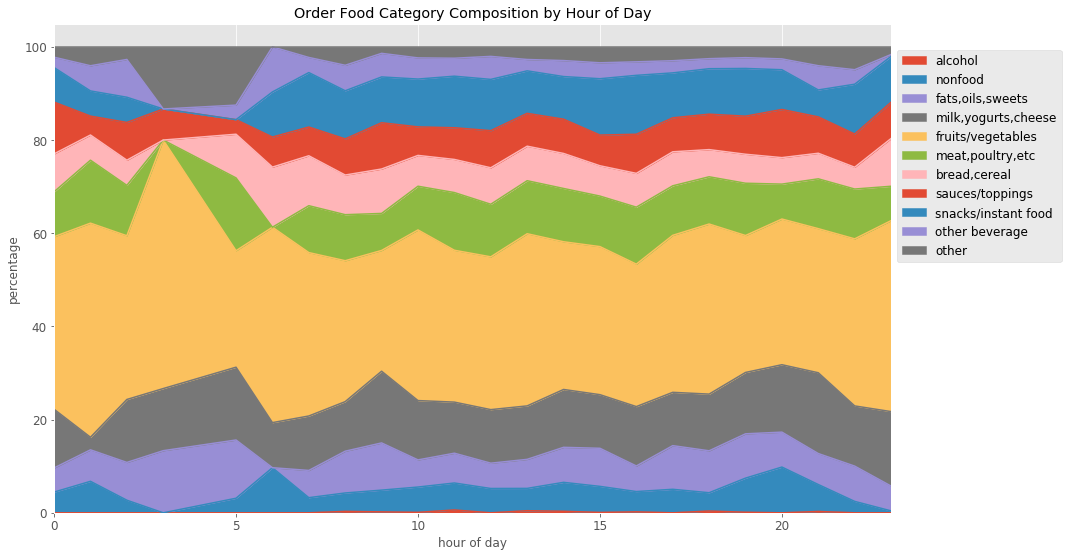

In [135]:
# Plot
food_cat_plot = order_food_cat_mean.plot.area(title = 'Order Food Category Composition by Hour of Day',\
                                             figsize=(15,9), fontsize=12, legend=True)
food_cat_plot.set_ylabel('percentage')
food_cat_plot.set_xlabel('hour of day')
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [34]:
# Hours when alcohol ratio in cart is highest
grouped_by_hr_instacart.groupby('order_hour_of_day').mean().sort_values('alcohol', ascending = False).head(5)

,alcohol,nonfood,na,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
order_hour_of_day,,,,,,,,,,,,
11,0.766667,5.293301,1.217374,8.536244,10.893193,29.824825,29.824825,5.901532,6.893538,10.879057,5.897378,2.113533
14,0.544270,8.875294,1.442028,6.893554,11.612829,29.583465,29.583465,7.785199,6.298049,6.746718,5.140765,3.872043
19,0.490196,6.231162,1.022032,10.534106,12.649277,30.228183,30.228183,5.746965,9.172069,9.161091,1.946428,2.312503
18,0.487013,2.485396,1.257290,9.152650,13.477782,34.616745,34.616745,6.523871,8.377860,9.507173,1.701613,2.840304
21,0.344828,6.727519,1.606583,7.664835,17.613675,28.506823,28.506823,3.811377,9.354974,4.157959,4.606782,3.865943


In [36]:
# Hours when fats,oils,sweets ratio in cart is highest
grouped_by_hr_instacart.groupby('order_hour_of_day').mean().sort_values('fats,oils,sweets', ascending = False).head(5)

,alcohol,nonfood,na,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
order_hour_of_day,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,25.000000,25.000000,36.363636,36.363636,0.000000,4.545455,0.000000,0.000000,9.090909
15,0.022883,5.754772,1.611428,12.737814,11.224404,28.699721,28.699721,5.421992,6.631215,10.776417,4.036314,3.726873
9,0.215750,6.097175,1.271554,11.431590,13.100909,24.743783,24.743783,8.933830,9.817481,6.584902,6.483949,1.409459
19,0.490196,6.231162,1.022032,10.534106,12.649277,30.228183,30.228183,5.746965,9.172069,9.161091,1.946428,2.312503
17,0.000000,4.607331,0.251599,10.324413,10.122835,30.129822,30.129822,6.458543,9.046430,9.670790,3.943626,3.726978


In [37]:
# Hours when fruits/vegetables ratio in cart is highest
grouped_by_hr_instacart.groupby('order_hour_of_day').mean().sort_values('fruits/vegetables', ascending = False).head(5)

,alcohol,nonfood,na,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
order_hour_of_day,,,,,,,,,,,,
6,0.0,8.333333,0.000000,0.000000,5.959596,52.474747,52.474747,7.323232,3.030303,11.363636,11.515152,0.000000
0,0.0,3.454462,0.512821,4.185814,10.807526,43.252858,43.252858,7.486125,9.135725,6.067405,2.347652,2.897103
1,0.0,4.921969,0.952381,5.034014,1.860744,42.513775,42.513775,13.095238,2.959645,4.421769,6.701142,5.054945
23,0.0,0.404858,0.584795,4.310609,15.383792,41.754185,41.754185,8.216032,8.112611,11.906544,0.292398,1.701223
7,0.0,2.896152,0.435730,4.656157,9.805815,39.352424,39.352424,9.510411,5.982180,9.488022,6.498195,1.902498


In [38]:
# Hours when snacks/instant food ratio in cart is highest
grouped_by_hr_instacart.groupby('order_hour_of_day').mean().sort_values('snacks/instant food', ascending = False).head(5)

,alcohol,nonfood,na,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
order_hour_of_day,,,,,,,,,,,,
16,0.167877,4.746538,1.283133,5.975360,11.381086,31.380260,31.380260,5.818155,7.366870,12.577549,3.963807,3.416630
23,0.000000,0.404858,0.584795,4.310609,15.383792,41.754185,41.754185,8.216032,8.112611,11.906544,0.292398,1.701223
6,0.000000,8.333333,0.000000,0.000000,5.959596,52.474747,52.474747,7.323232,3.030303,11.363636,11.515152,0.000000
11,0.766667,5.293301,1.217374,8.536244,10.893193,29.824825,29.824825,5.901532,6.893538,10.879057,5.897378,2.113533
15,0.022883,5.754772,1.611428,12.737814,11.224404,28.699721,28.699721,5.421992,6.631215,10.776417,4.036314,3.726873
